In [39]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import folium
import pandas_profiling

% matplotlib inline
# % config InlineBackend.figure_format = 'retina'  # 设置图像清晰度


In [3]:
data = pd.read_csv("E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Aquastat\data\\aquastat.csv.gzip"
                   , compression="gzip")
print(data.shape)
data.head()


(143280, 7)


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>country</th>
      <th>region</th>
      <th>variable</th>
      <th>variable_full</th>
      <th>time_period</th>
      <th>year_measured</th>
      <th>value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Afghanistan</td>
      <td>World | Asia</td>
      <td>total_area</td>
      <td>Total area of the country (1000 ha)</td>
      <td>1958-1962</td>
      <td>1962.0</td>
      <td>65286.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Afghanistan</td>
      <td>World | Asia</td>
      <td>total_area</td>
      <td>Total area of the country (1000 ha)</td>
      <td>1963-1967</td>
      <td>1967.0</td>
      <td>65286.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Afghanistan</td>
      <td>World | Asia</td>
      <td>total_area</td>
      <td>Total area of the country (1000 ha)</td>
      <td>1968-1972</td>
      <td>1972.0</td>
      <td>65286.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Afghanistan</td>
      <td>World | Asia</td>
      <td>total_area</td>
      <td>Total area of the country (1000 ha)</td>
      <td>1973-1977</td>
      <td>1977.0</td>
      <td>65286.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Afghanistan</td>
      <td>World | Asia</td>
      <td>total_area</td>
      <td>Total area of the country (1000 ha)</td>
      <td>1978-1982</td>
      <td>1982.0</td>
      <td>65286.0</td>
    </tr>
  </tbody>
</table>
</div>

In [4]:
# 字典对应
simple_regions = {
    'World | Asia': 'Asia',
    'Americas | Central America and Caribbean | Central America': 'North America',
    'Americas | Central America and Caribbean | Greater Antilles': 'North America',
    'Americas | Central America and Caribbean | Lesser Antilles and Bahamas': 'North America',
    'Americas | Northern America | Northern America': 'North America',
    'Americas | Northern America | Mexico': 'North America',
    'Americas | Southern America | Guyana': 'South America',
    'Americas | Southern America | Andean': 'South America',
    'Americas | Southern America | Brazil': 'South America',
    'Americas | Southern America | Southern America': 'South America',
    'World | Africa': 'Africa',
    'World | Europe': 'Europe',
    'World | Oceania': 'Oceania'
}
data.region = data.region.apply(lambda x: simple_regions[x])


In [5]:
# 按照时间线查看数据
def time_slice(df, time_period):
    df = df[df["time_period"] == time_period]

    df = df.pivot(index="country", columns="variable", values="value")
    df.columns.name = time_period

    return df


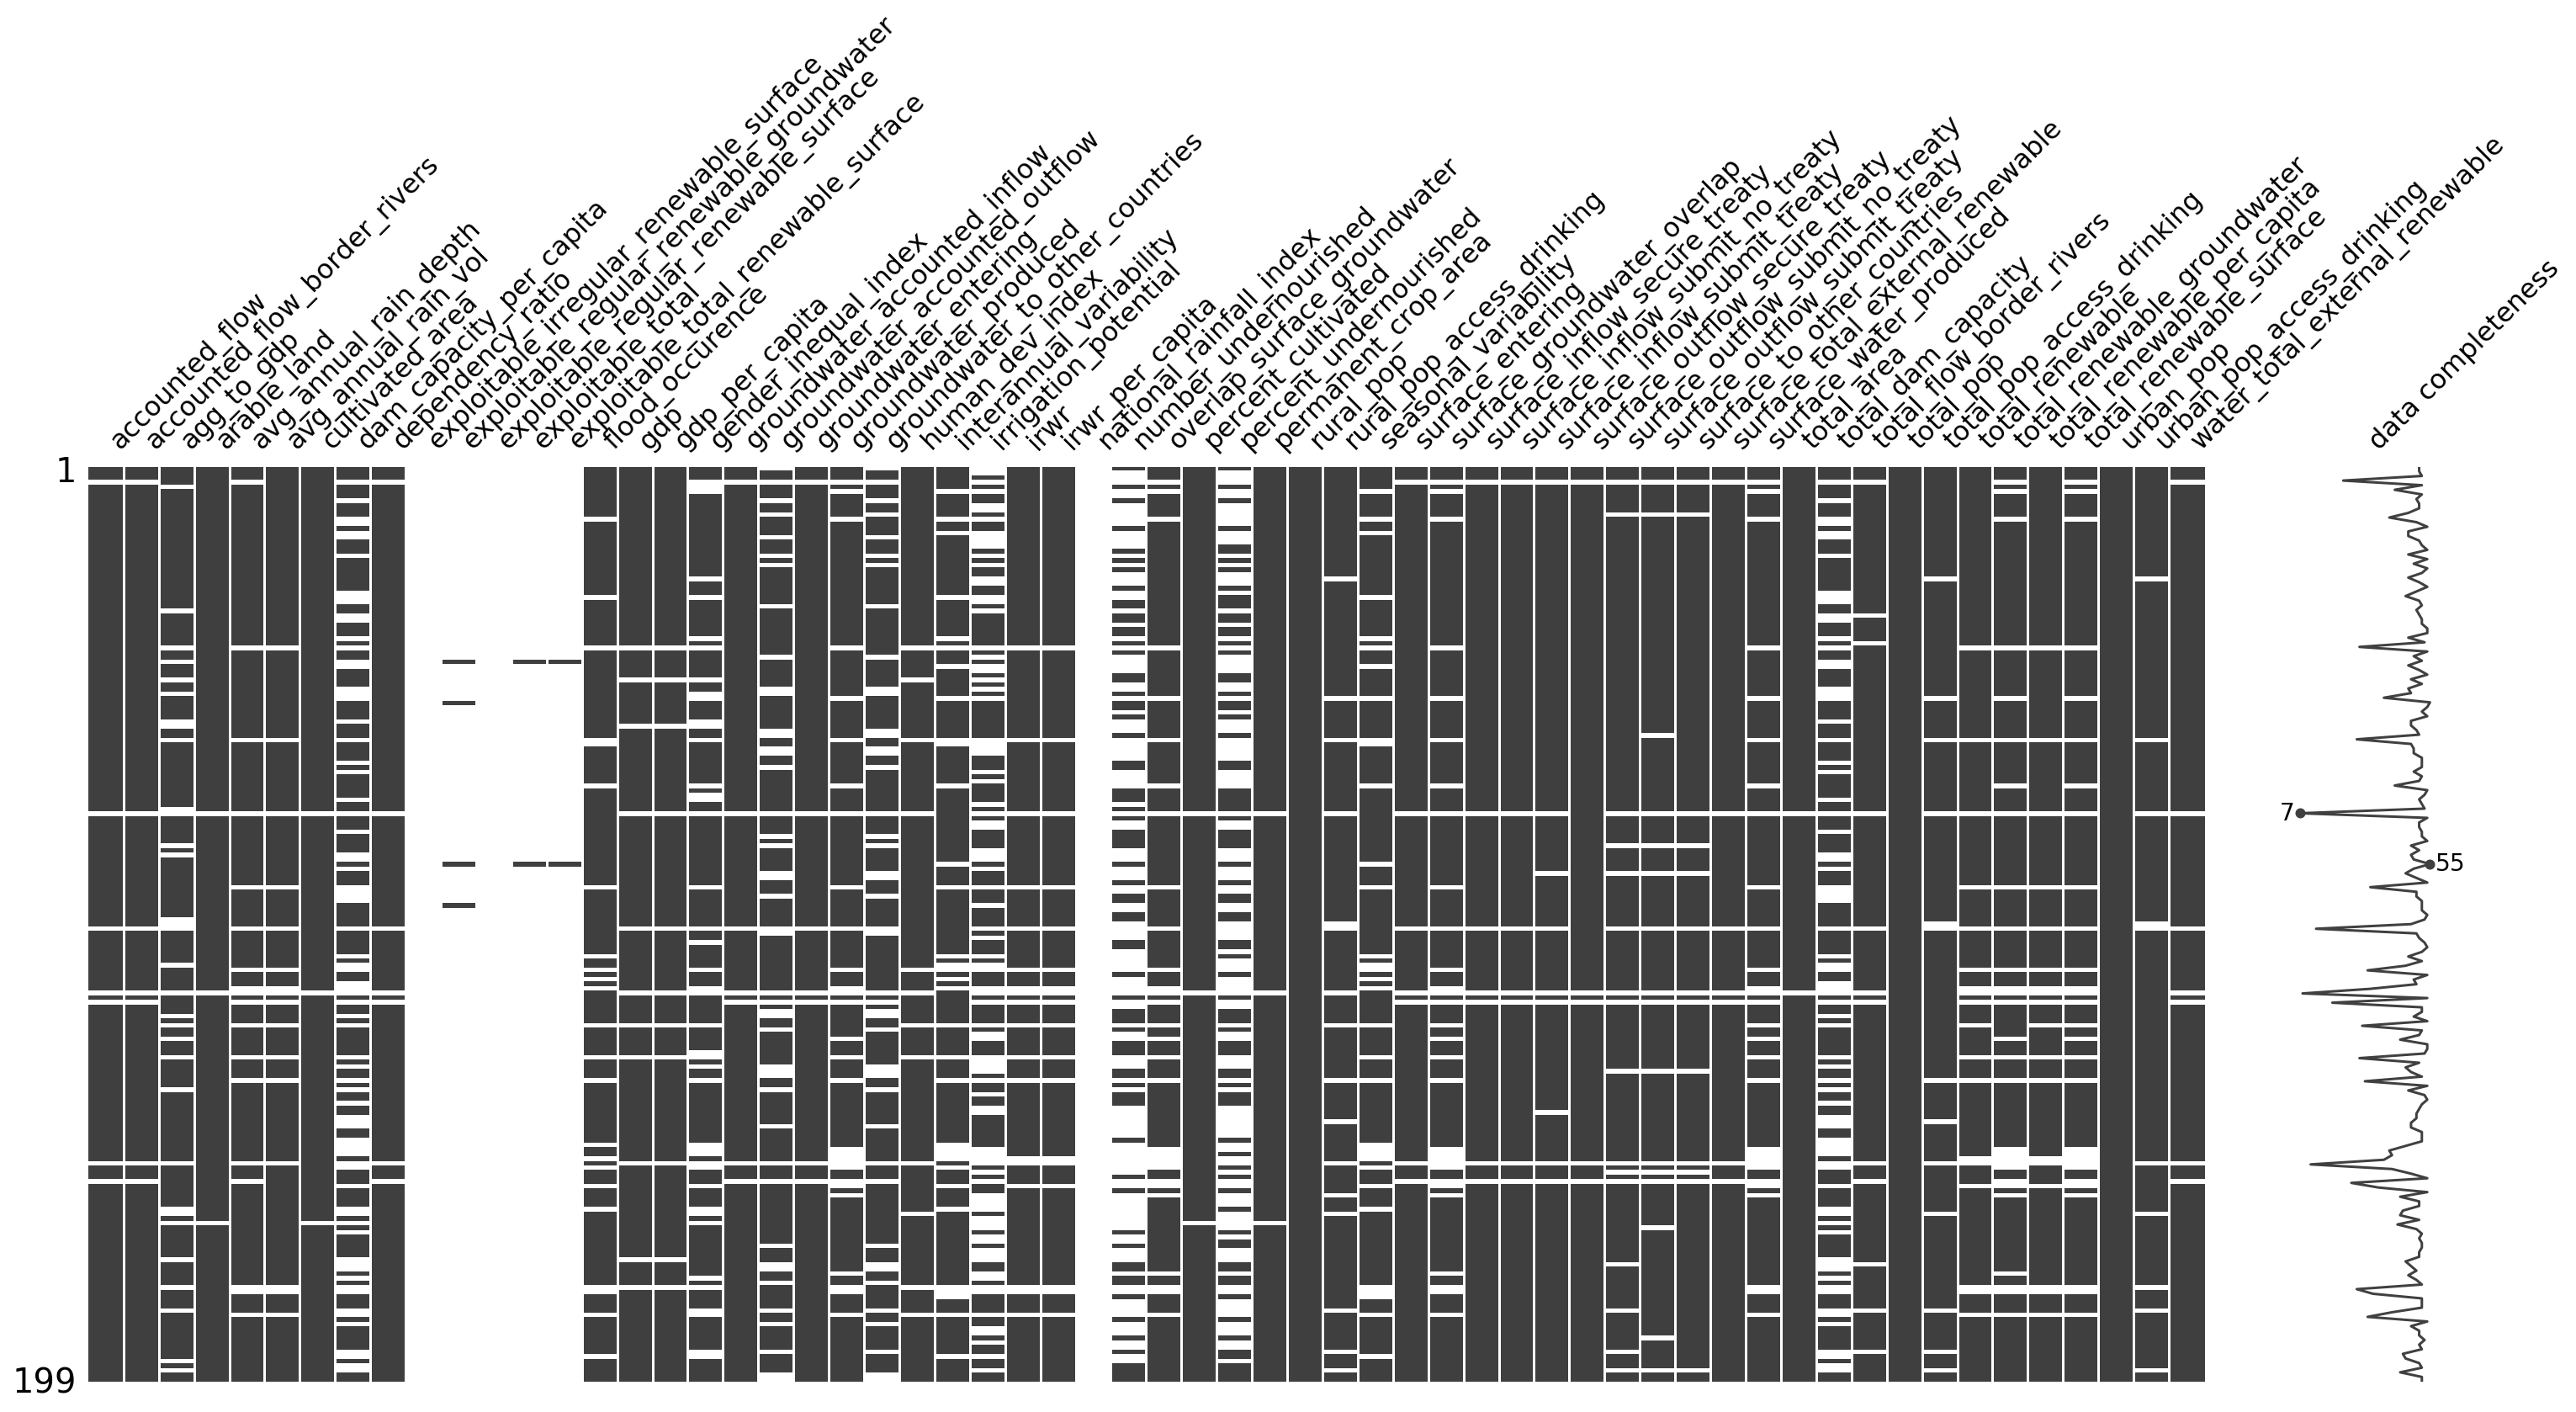

In [11]:
# 查看数据缺失情况
recent = time_slice(data, "2013-2017")
msno.matrix(recent, labels=True)


In [12]:
# 按照variable来切分数据
def variable_slice(df, variable):
    # Only data for that variable
    df = df[df["variable"] == variable]

    # Get variable for each country over the time periods 
    df = df.pivot(index='country', columns='time_period', values='value')
    return df


Text(0,0.5,'Country')

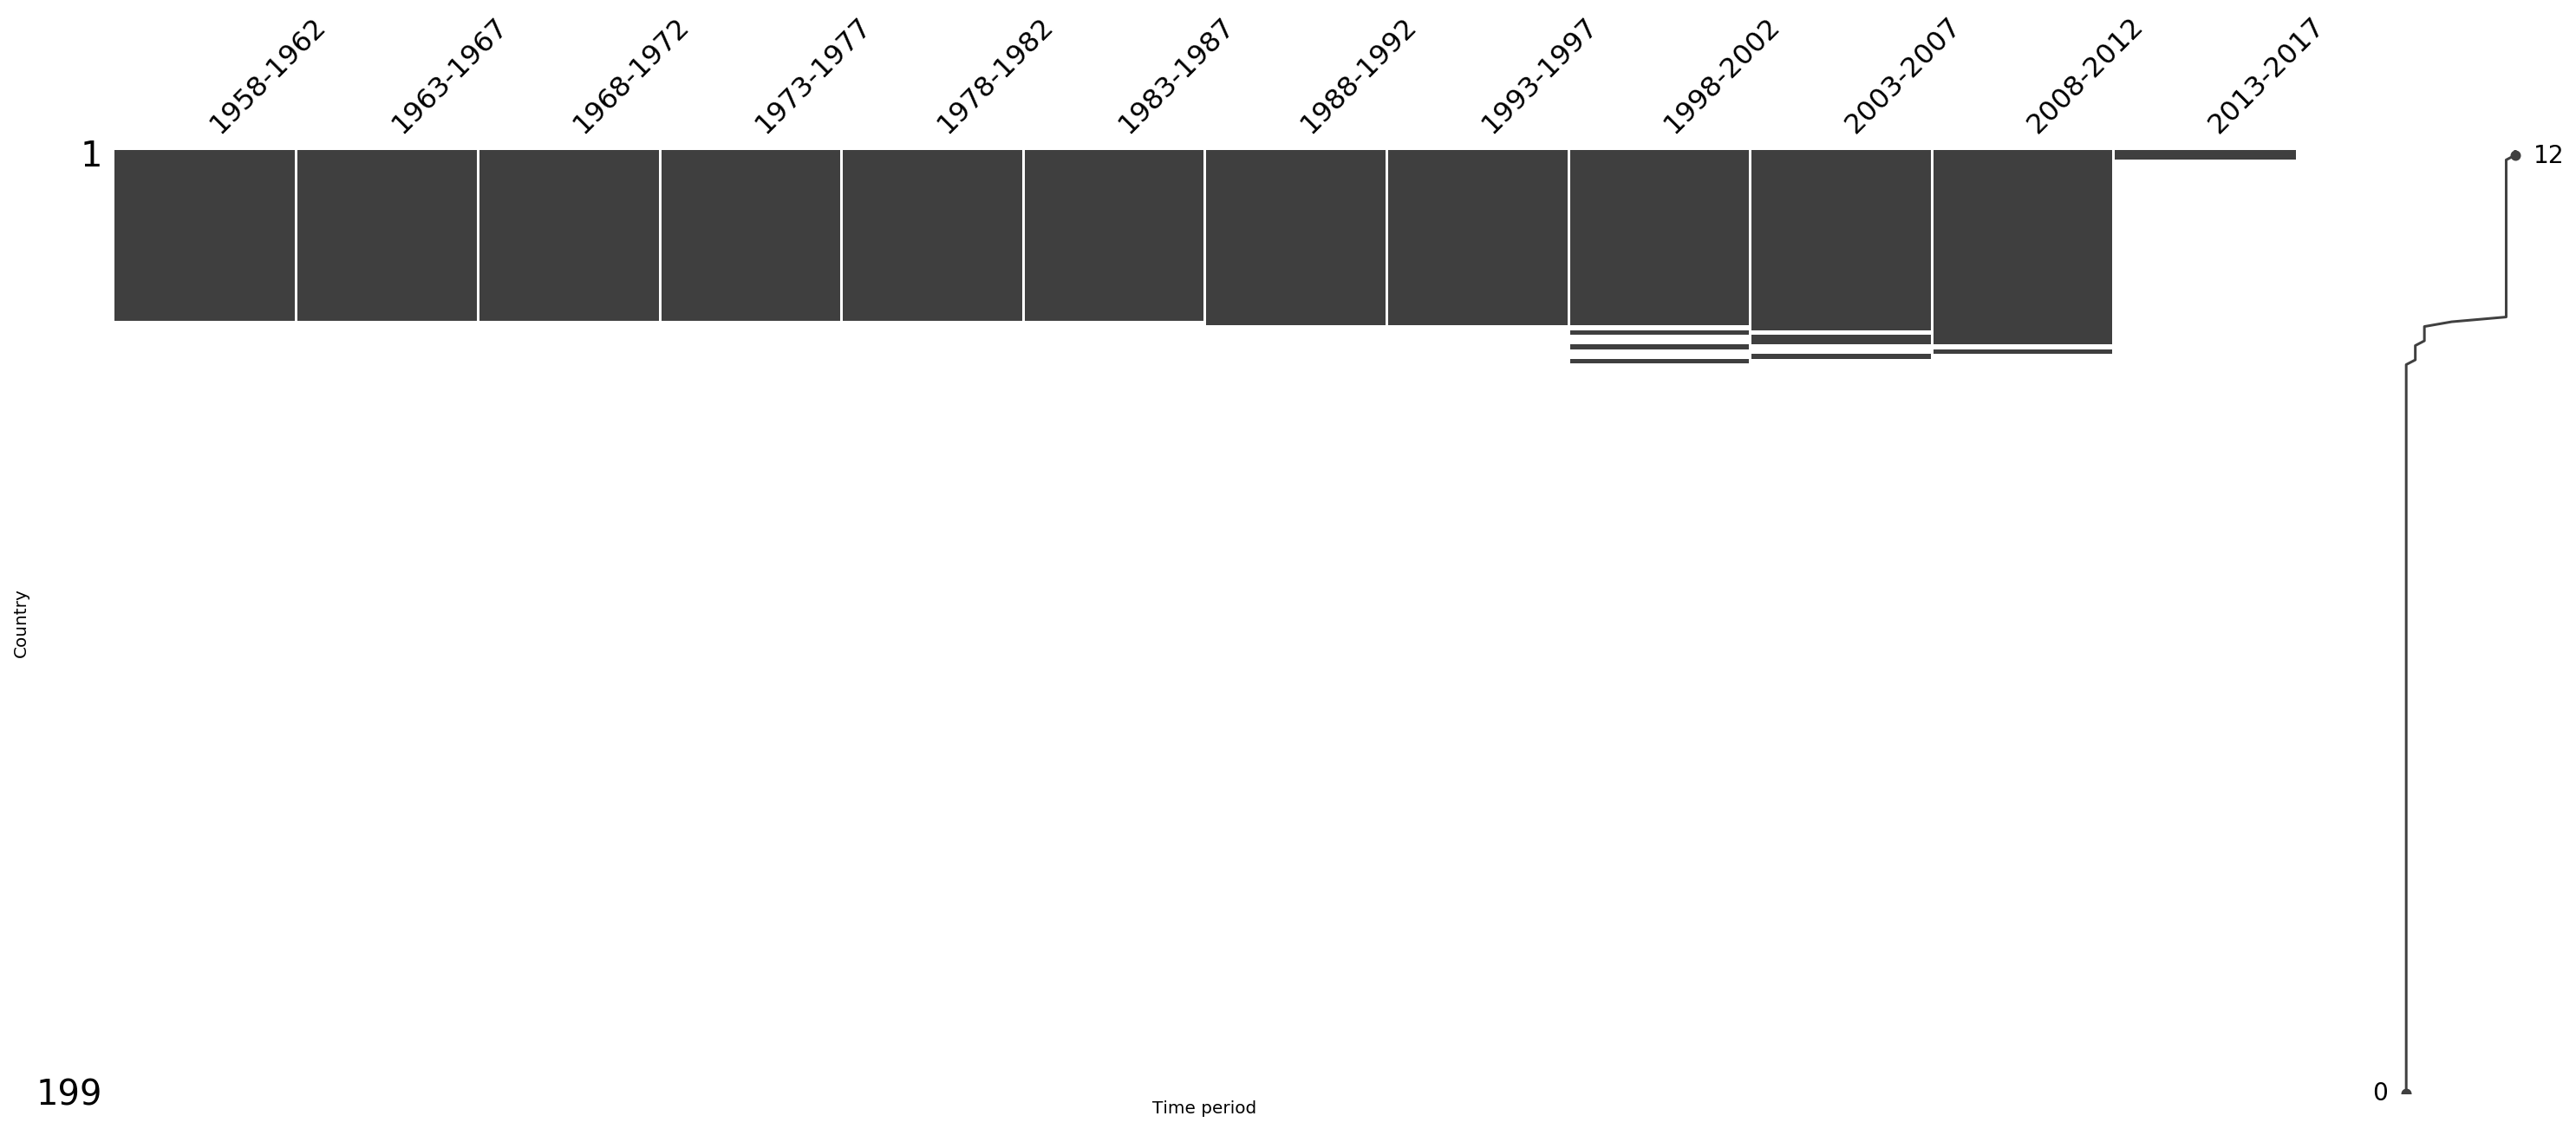

In [13]:
# 查看水资源数据缺失情况
msno.matrix(variable_slice(data, "exploitable_total"), inline=False, sort="descending")
plt.xlabel("Time period")
plt.ylabel("Country")

# 可以看到只有一部分国家会上报水资源数量。所以我们删除这个变量


In [14]:
data = data.loc[~data["variable"].str.contains("exploitable"), :]


Text(0,0.5,'Country')

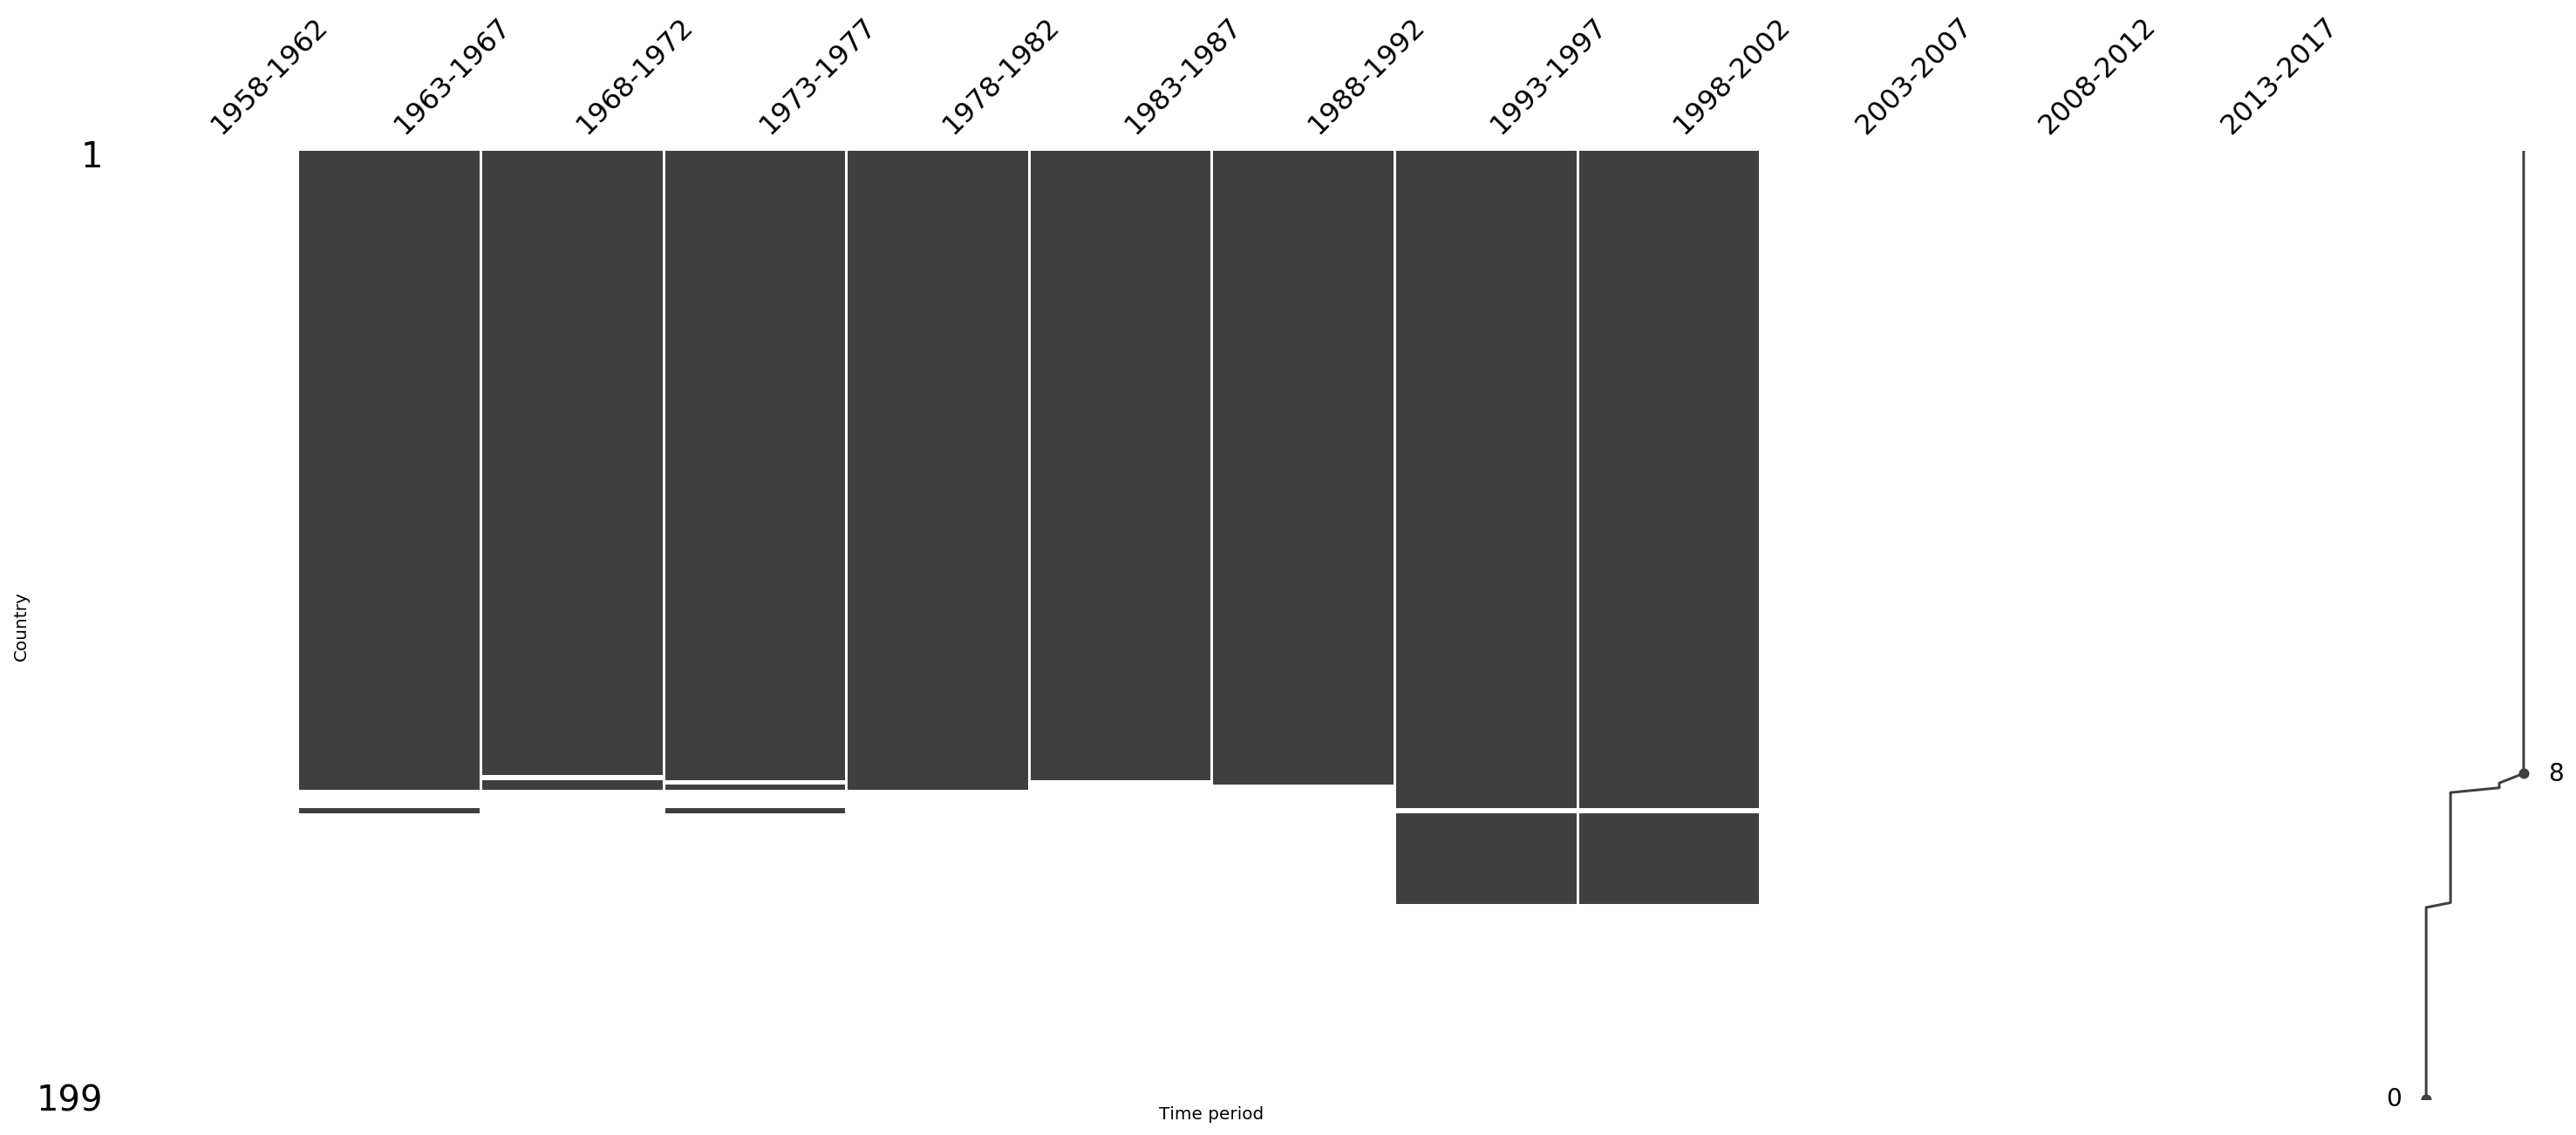

In [15]:
# 全国降水指数
msno.matrix(variable_slice(data, "national_rainfall_index"), inline=False, sort="descending")
plt.xlabel("Time period")
plt.ylabel("Country")

# 可以看到从2002开始就没有这个数据了，所以也删除


In [16]:
data = data.loc[~(data["variable"] == "national_rainfall_index")]


In [17]:
def subregion(data, region):
    return data[data.region == region]


In [18]:
north_america = subregion(data, 'North America')


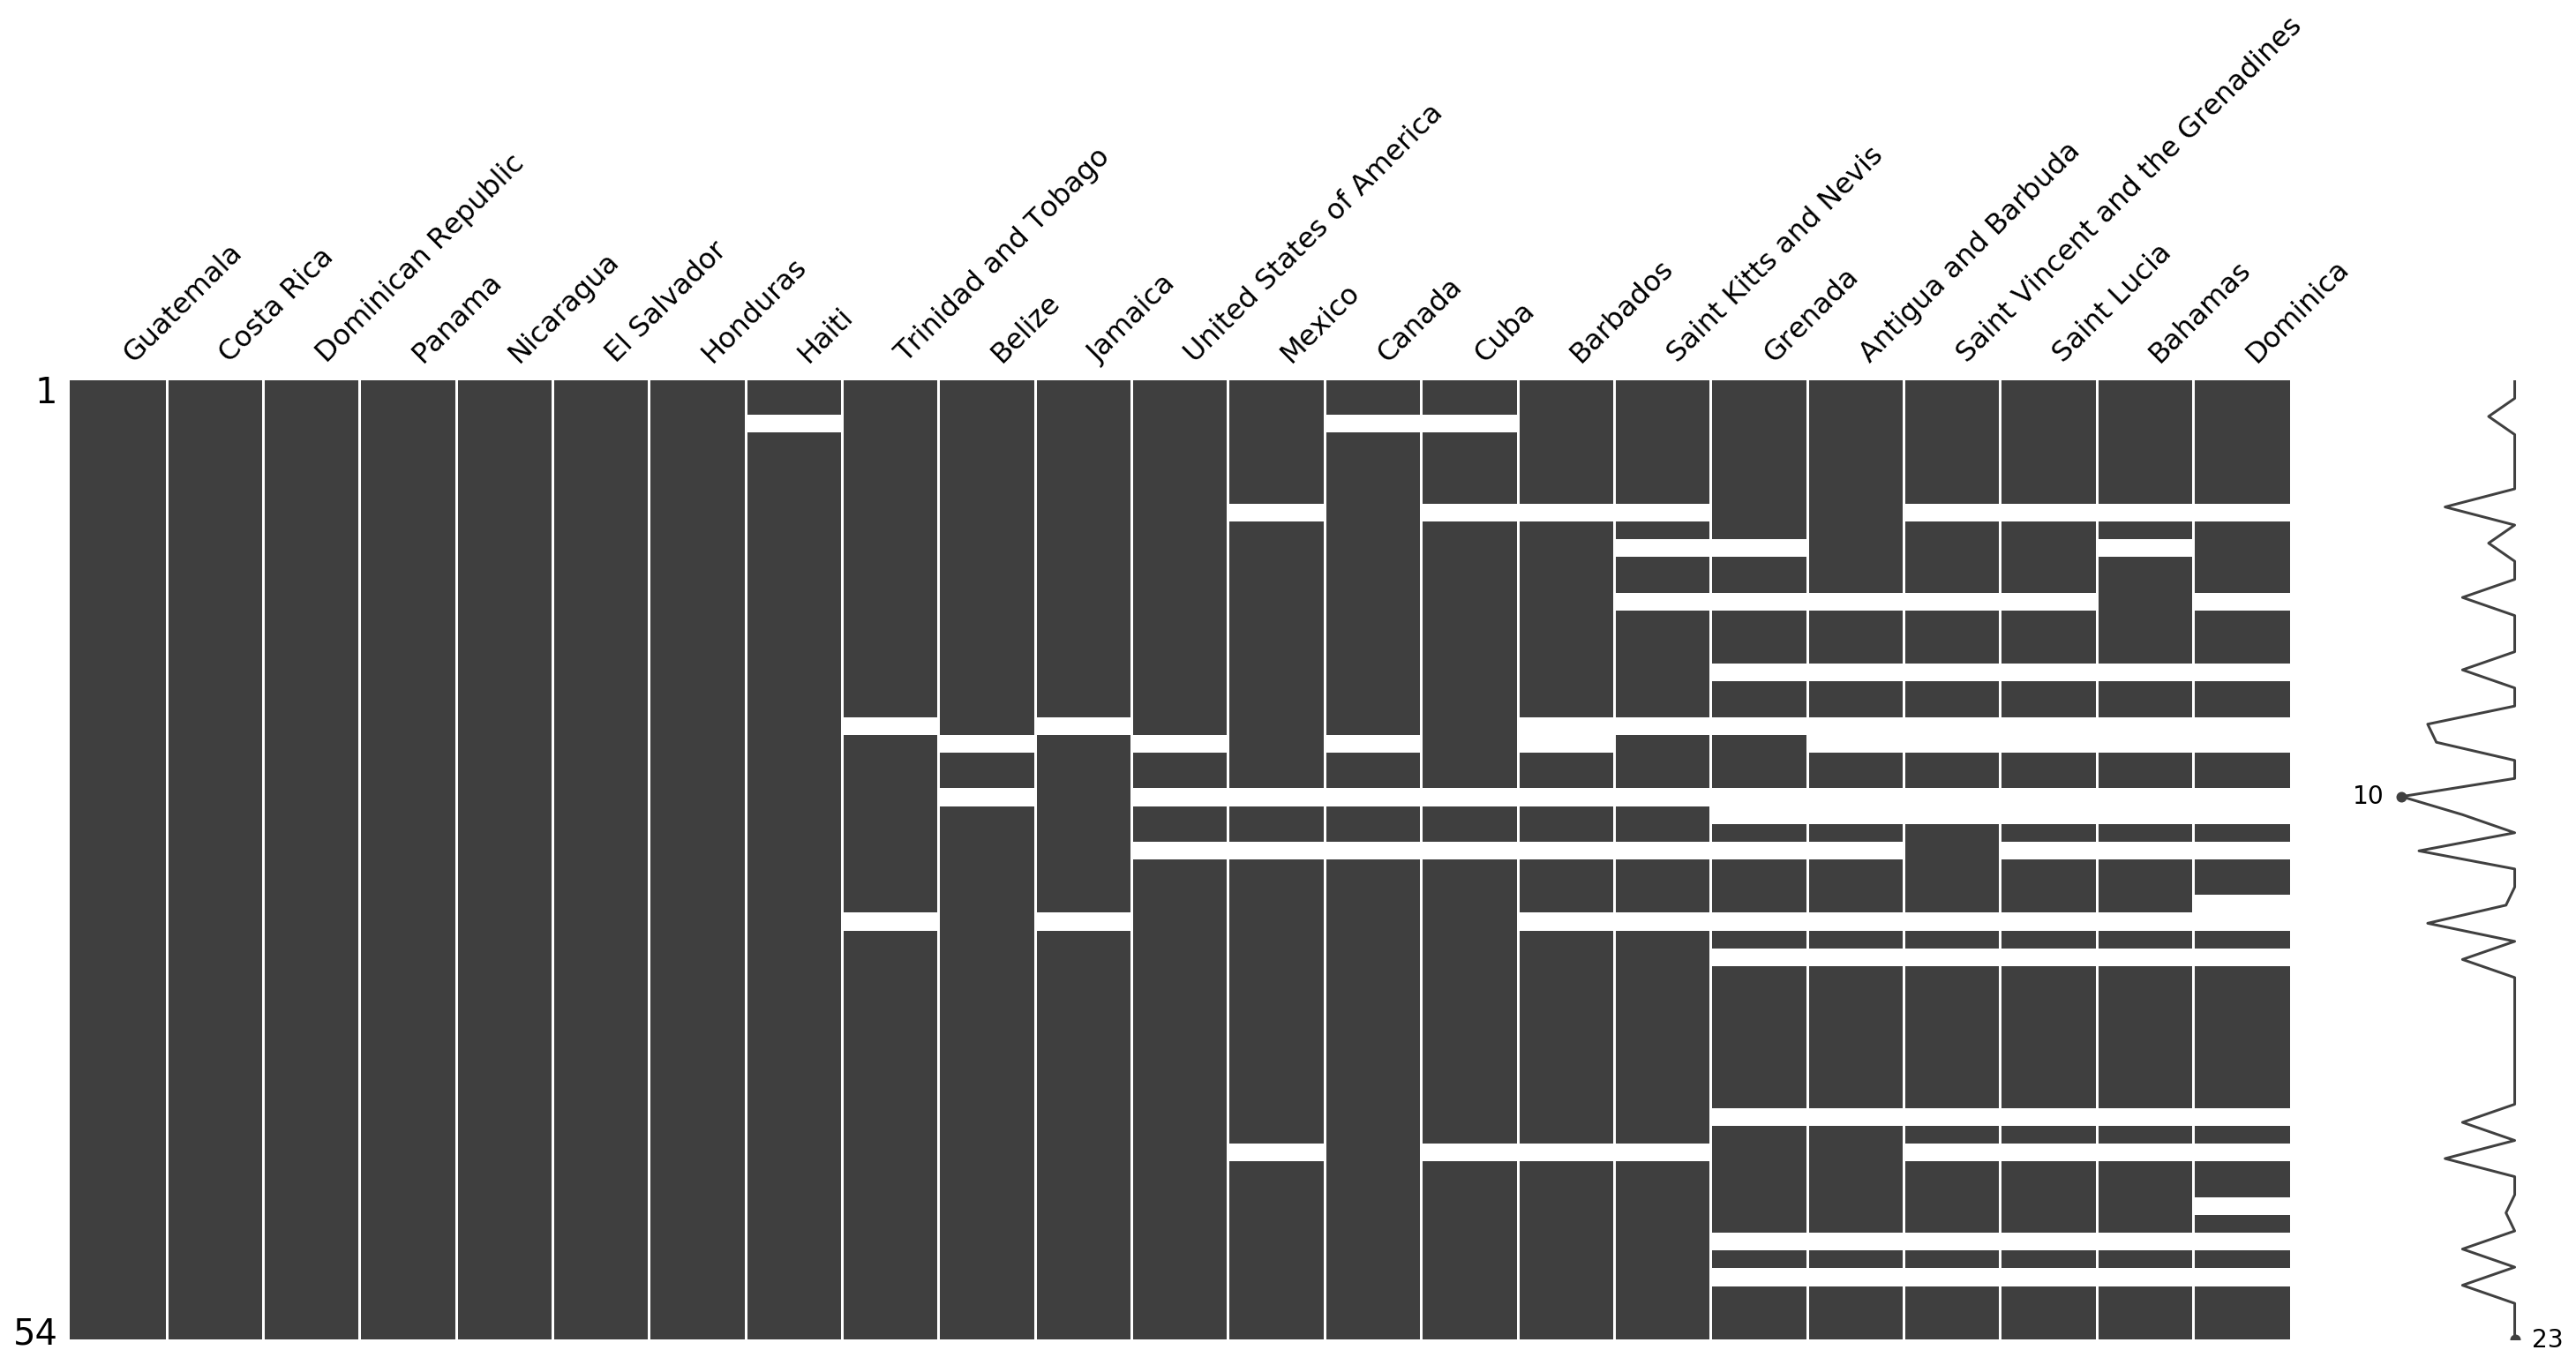

In [19]:
msno.matrix(msno.nullity_sort(time_slice(north_america, '2013-2017'), sort='descending').T, inline=False)


In [20]:
def country_slice(df, country):
    # Only take data for country of interest
    df = df[df.country == country]

    # Pivot table 
    df = df.pivot(index='variable', columns='time_period', values='value')

    df.index.name = country
    return df


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Bahamas</th>
      <th>dam_capacity_per_capita</th>
      <th>flood_occurence</th>
      <th>gender_inequal_index</th>
      <th>groundwater_produced</th>
      <th>interannual_variability</th>
      <th>irrigation_potential</th>
      <th>number_undernourished</th>
      <th>overlap_surface_groundwater</th>
      <th>percent_undernourished</th>
      <th>seasonal_variability</th>
      <th>surface_groundwater_overlap</th>
      <th>surface_water_produced</th>
      <th>total_dam_capacity</th>
      <th>total_renewable_groundwater</th>
      <th>total_renewable_surface</th>
    </tr>
    <tr>
      <th>time_period</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1958-1962</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1963-1967</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1968-1972</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1973-1977</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1978-1982</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1983-1987</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1988-1992</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1993-1997</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1998-2002</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN

In [22]:
# 查看巴哈马的数据缺失情况
msno.nullity_filter(country_slice(data, 'Bahamas').T, filter='bottom', p=0.1)


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Bahamas</th>
      <th>dam_capacity_per_capita</th>
      <th>flood_occurence</th>
      <th>gender_inequal_index</th>
      <th>groundwater_produced</th>
      <th>interannual_variability</th>
      <th>irrigation_potential</th>
      <th>number_undernourished</th>
      <th>overlap_surface_groundwater</th>
      <th>percent_undernourished</th>
      <th>seasonal_variability</th>
      <th>surface_groundwater_overlap</th>
      <th>surface_water_produced</th>
      <th>total_dam_capacity</th>
      <th>total_renewable_groundwater</th>
      <th>total_renewable_surface</th>
    </tr>
    <tr>
      <th>time_period</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1958-1962</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1963-1967</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1968-1972</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1973-1977</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1978-1982</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1983-1987</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1988-1992</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1993-1997</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1998-2002</th>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN

In [33]:
# JSON with coordinates for country boundaries 
null_data = recent['agg_to_gdp'].notnull() * 1
map = folium.Map(location=[48, -102], zoom_start=2)
map.choropleth(geo_data="E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Aquastat\data\world.json",
               data=null_data,
               columns=['country', 'agg_to_gdp'],
               key_on='feature.properties.name', reset=True,
               fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
               legend_name='Missing agricultural contribution to GDP data 2013-2017')

map


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfOGJhYTBlYmZlNTExNGRkMWE2OThiYTI3Y2E4MDIxZmYgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL2QzLzMuNS41L2QzLm1pbi5qcyI+PC9zY3JpcHQ+CjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfOGJhYTBlYmZlNTExNGRkMWE2OThiYTI3Y2E4MDIxZmYiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAoKICAgICAgICAgICAgCiAgICAgICAgICAgICAgICB2YXIgYm91bmRzID0gbnVsbDsKICAgICAgICAgICAgCgogICAgICAgICAgICB2YXIgbWFwXzhiYWEwZWJmZTUxMTRkZDFhNjk4YmEyN2NhODAyMWZmID0gTC5tYXAoCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAnbWFwXzhiYWEwZWJmZTUxMTRkZDFhNjk4YmEyN2NhODAyMWZmJywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHtjZW50ZXI6IFs0OCwtMTAyXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHpvb206IDIsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBtYXhCb3VuZHM6IGJvdW5kcywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGxheWVyczogW10sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB3b3JsZENvcHlKdW1wOiBmYWxzZSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGNyczogTC5DUlMuRVBTRzM4NTcKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgfSk7CiAgICAgICAgICAgIAogICAgICAgIAogICAgCiAgICAgICAgICAgIHZhciB0aWxlX2xheWVyX2FiYzcwOGU4YmJhODRjYzRhYjIwNDkwYWQ3MWY3MGQ2ID0gTC50aWxlTGF5ZXIoCiAgICAgICAgICAgICAgICAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLAogICAgICAgICAgICAgICAgewogICJhdHRyaWJ1dGlvbiI6IG51bGwsCiAgImRldGVjdFJldGluYSI6IGZhbHNlLAogICJtYXhab29tIjogMTgsCiAgIm1pblpvb20iOiAxLAogICJub1dyYXAiOiBmYWxzZSwKICAic3ViZG9tYWlucyI6ICJhYmMiCn0KICAgICAgICAgICAgICAgICkuYWRkVG8obWFwXzhiYWEwZWJmZTUxMTRkZDFhNjk4YmEyN2NhODAyMWZmKTsKICAgICAgICAKICAgIAoKICAgICAgICAgICAgCgo

In [34]:
def plot_null_map(df, time_period, variable,
                  legend_name=None):

    ts = time_slice(df, time_period).reset_index().copy()
    ts[variable] = ts[variable].notnull() * 1
    map = folium.Map(location=[48, -102], zoom_start=2)
    map.choropleth(geo_data="E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\Aquastat\data\world.json",
                   data=ts,
                   columns=['country', variable],
                   key_on='feature.properties.name', reset=True,
                   fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
                   legend_name=legend_name if legend_name else variable)
    return map


In [35]:
plot_null_map(data, '2013-2017', 'number_undernourished', 'Number undernourished is missing')


<div style="width:100%;"><div style="position:relative;width:100%;height:0;padding-bottom:60%;"><iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC5taW4uY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiIC8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIgLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuY3NzIiAvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2dpdC5jb20vcHl0aG9uLXZpc3VhbGl6YXRpb24vZm9saXVtL21hc3Rlci9mb2xpdW0vdGVtcGxhdGVzL2xlYWZsZXQuYXdlc29tZS5yb3RhdGUuY3NzIiAvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfNGE5YTU3MTI1ZDA0NGQwN2JjZTZmMDIwZWJhNGMwYzEgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL2QzLzMuNS41L2QzLm1pbi5qcyI+PC9zY3JpcHQ+CjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfNGE5YTU3MTI1ZDA0NGQwN2JjZTZmMDIwZWJhNGMwYzEiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAoKICAgICAgICAgICAgCiAgICAgICAgICAgICAgICB2YXIgYm91bmRzID0gbnVsbDsKICAgICAgICAgICAgCgogICAgICAgICAgICB2YXIgbWFwXzRhOWE1NzEyNWQwNDRkMDdiY2U2ZjAyMGViYTRjMGMxID0gTC5tYXAoCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAnbWFwXzRhOWE1NzEyNWQwNDRkMDdiY2U2ZjAyMGViYTRjMGMxJywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHtjZW50ZXI6IFs0OCwtMTAyXSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHpvb206IDIsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBtYXhCb3VuZHM6IGJvdW5kcywKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGxheWVyczogW10sCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB3b3JsZENvcHlKdW1wOiBmYWxzZSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIGNyczogTC5DUlMuRVBTRzM4NTcKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgfSk7CiAgICAgICAgICAgIAogICAgICAgIAogICAgCiAgICAgICAgICAgIHZhciB0aWxlX2xheWVyXzc5NThhOWVkMzFhMDQwMWNhZjUzNmNiNjYzMWE3YWY2ID0gTC50aWxlTGF5ZXIoCiAgICAgICAgICAgICAgICAnaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmcnLAogICAgICAgICAgICAgICAgewogICJhdHRyaWJ1dGlvbiI6IG51bGwsCiAgImRldGVjdFJldGluYSI6IGZhbHNlLAogICJtYXhab29tIjogMTgsCiAgIm1pblpvb20iOiAxLAogICJub1dyYXAiOiBmYWxzZSwKICAic3ViZG9tYWlucyI6ICJhYmMiCn0KICAgICAgICAgICAgICAgICkuYWRkVG8obWFwXzRhOWE1NzEyNWQwNDRkMDdiY2U2ZjAyMGViYTRjMGMxKTsKICAgICAgICAKICAgIAoKICAgICAgICAgICAgCgo

Text(0.5,1,'Number of countries with data reported for each variable over time')

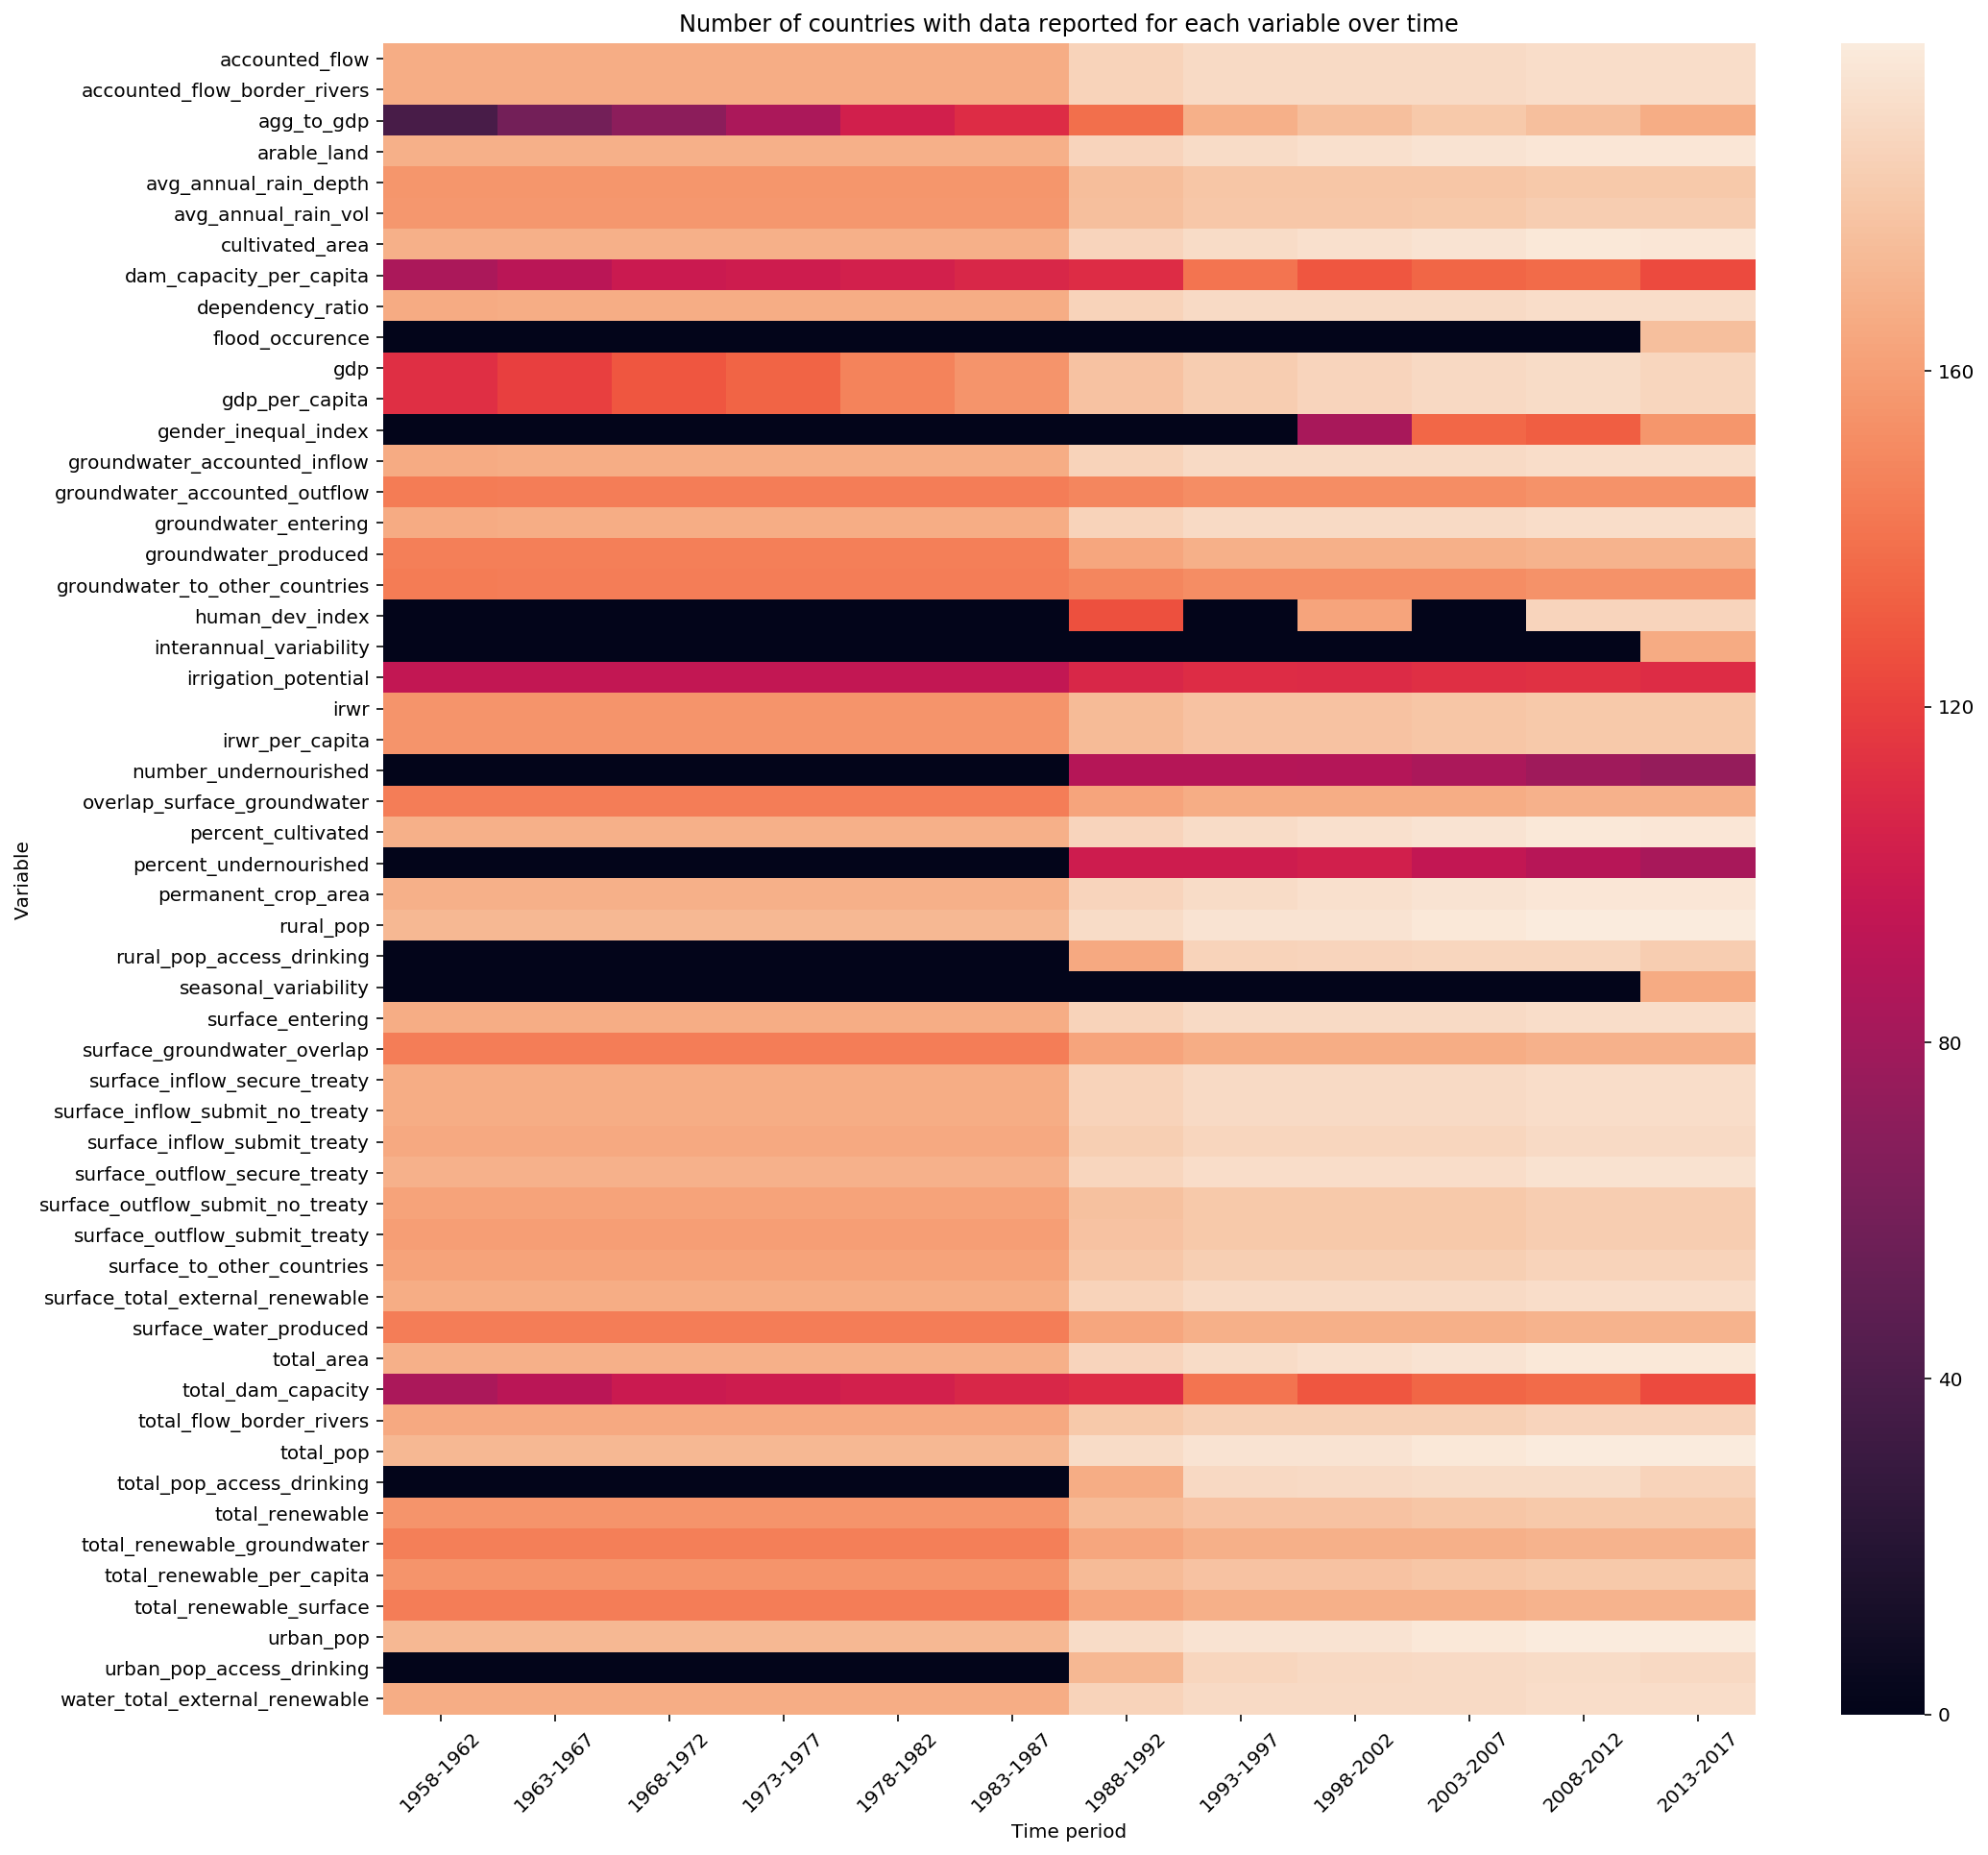

In [37]:
fig, ax = plt.subplots(figsize=(16, 16));
sns.heatmap(data.groupby(['time_period', 'variable']).value.count().unstack().T, ax=ax)
plt.xticks(rotation=45)
plt.xlabel('Time period')
plt.ylabel('Variable')
plt.title('Number of countries with data reported for each variable over time')


In [42]:
pandas_profiling.ProfileReport(time_slice(data, '2013-2017'))


<meta charset="UTF-8">

<style>

        .variablerow {
            border: 1px solid #e1e1e8;
            border-top: hidden;
            padding-top: 2em;
            padding-bottom: 2em;
            padding-left: 1em;
            padding-right: 1em;
        }

        .headerrow {
            border: 1px solid #e1e1e8;
            background-color: #f5f5f5;
            padding: 2em;
        }
        .namecol {
            margin-top: -1em;
            overflow-x: auto;
        }

        .dl-horizontal dt {
            text-align: left;
            padding-right: 1em;
            white-space: normal;
        }

        .dl-horizontal dd {
            margin-left: 0;
        }

        .ignore {
            opacity: 0.4;
        }

        .container.pandas-profiling {
            max-width:975px;
        }

        .col-md-12 {
            padding-left: 2em;
        }

        .indent {
            margin-left: 1em;
        }

        .center-img {
            margin-left: auto !important;
            margin-right: auto !important;
            display: block;
        }

        /* Table example_values */
            table.example_values {
                border: 0;
            }

            .example_values th {
                border: 0;
                padding: 0 ;
                color: #555;
                font-weight: 600;
            }

            .example_values tr, .example_values td{
                border: 0;
                padding: 0;
                color: #555;
            }

        /* STATS */
            table.stats {
                border: 0;
            }

            .stats th {
                border: 0;
                padding: 0 2em 0 0;
                color: #555;
                font-weight: 600;
            }

            .stats tr {
                border: 0;
            }

            .stats td{
                color: #555;
                padding: 1px;
                border: 0;
            }


        /* Sample table */
            table.sample {
                border: 0;
                margin-bottom: 2em;
                margin-left:1em;
            }
            .sample tr {
                border:0;
            }
            .sample td, .sample th{
                padding: 0.5em;
                white-space: nowrap;
                border: none;

            }

            .sample thead {
                border-top: 0;
                border-bottom: 2px solid #ddd;
            }

            .sample td {
                width:100%;
            }


        /* There is no good solution available to make the divs equal height and then center ... */
            .histogram {
                margin-top: 3em;
            }
        /* Freq table */

            table.freq {
                margin-bottom: 2em;
                border: 0;
            }
            table.freq th, table.freq tr, table.freq td {
                border: 0;
                padding: 0;
            }

            .freq thead {
                font-weight: 600;
                white-space: nowrap;
                overflow: hidden;
                text-overflow: ellipsis;

            }

            td.fillremaining{
                width:auto;
                max-width: none;
            }

            td.number, th.number {
                text-align:right ;
            }

        /* Freq mini */
            .freq.mini td{
                width: 50%;
                padding: 1px;
                font-size: 12px;

            }
            table.freq.mini {
                 width:100%;
            }
            .freq.mini th {
                overflow: hidden;
                text-overflow: ellipsis;
                white-space: nowrap;
                max-width: 5em;
                font-weight: 400;
                text-align:right;
                padding-right: 0.5em;
            }

            .missing {
                color: #a94442;
            }
            .alert, .alert > th, .alert > td {
                col